Run the file where data is preprocessed.

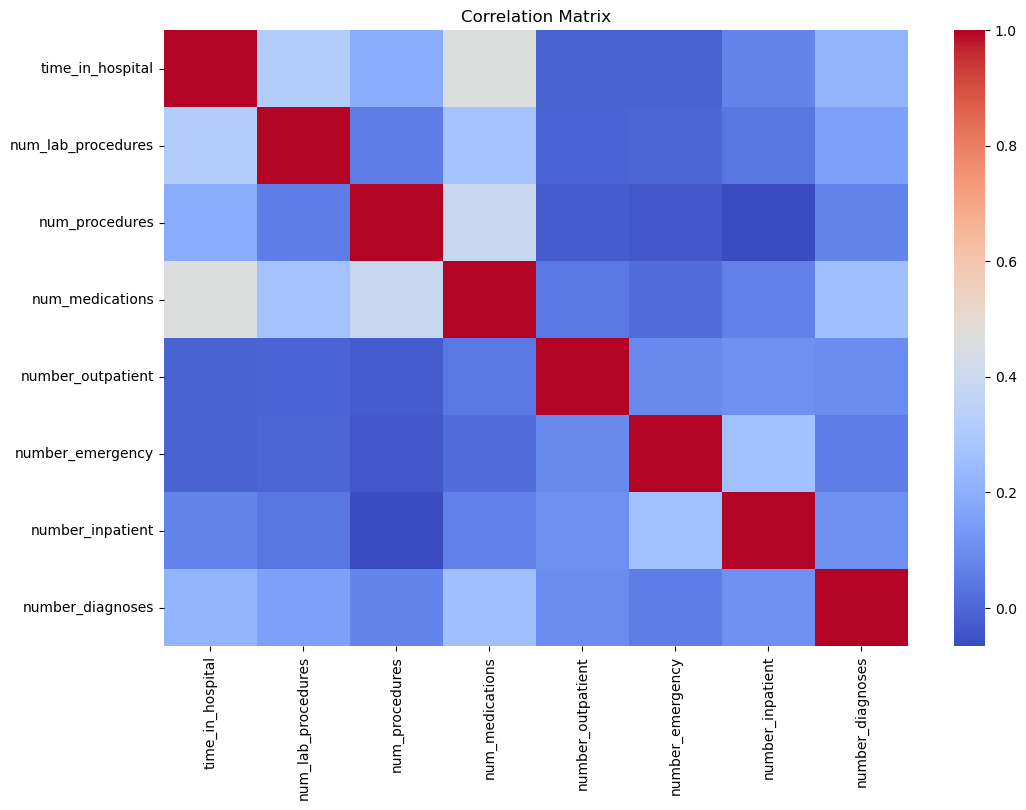

Number of features for 0.9999 explained variance: 12


In [4]:
%run preprocessing.py

Perform grid search for the selected model. Print the parameters corresponding with the best macro F1 score.

In [5]:
from xgboost import XGBClassifier

# we play with many different values for the most important hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the ensemble
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
}

# make an instance of the model
model = XGBClassifier()

# the basic syntax for performing a grid search with the previously defined grid parameters
# and the custom scoring function, with 3 folds in cross validation
grid_search = GridSearchCV(model, param_grid, scoring=scoring_metric, cv=3)
# we fit the model
grid_search.fit(X_train, y_train)
# a variable in which we store the best parameters found by the grid search
best_params = grid_search.best_params_
print(best_params)

{'learning_rate': 0.1, 'n_estimators': 300}


Use the model with the best parameters to predict the test data. Display the classification report.

In [6]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.63      0.74      0.68     10952
           1       0.62      0.51      0.56      9402

    accuracy                           0.63     20354
   macro avg       0.63      0.62      0.62     20354
weighted avg       0.63      0.63      0.63     20354



In [7]:
from sklearn.metrics import confusion_matrix

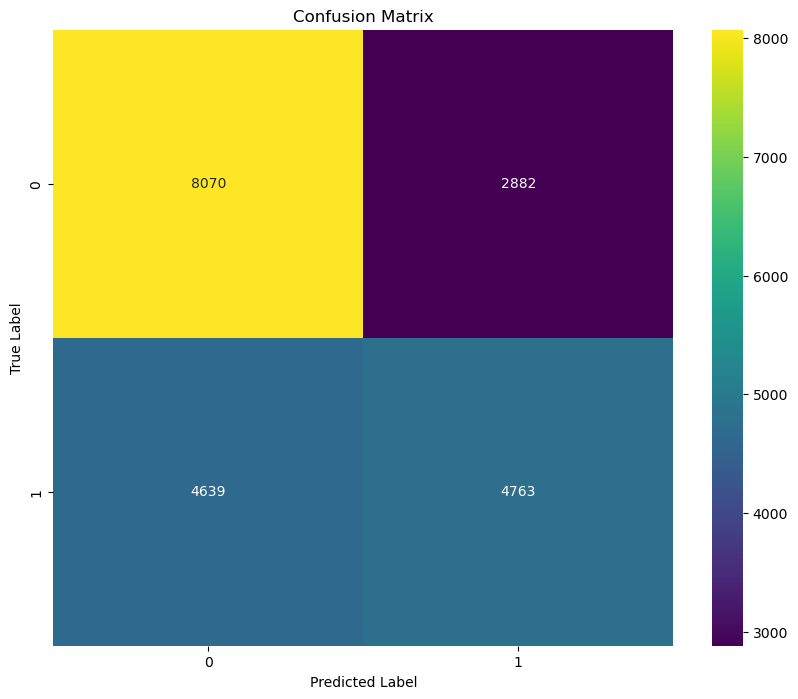

In [8]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Update the performance table with the new results.

In [9]:
write_conclusions(model, f1, acc)